In [128]:
!rm -r interrogador_v0

In [129]:
!git clone https://github.com/manueljerez7/interrogador_v0

Cloning into 'interrogador_v0'...
remote: Enumerating objects: 205, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 205 (delta 4), reused 17 (delta 4), pack-reused 185
Receiving objects: 100% (205/205), 223.66 MiB | 13.95 MiB/s, done.
Resolving deltas: 100% (74/74), done.
Updating files: 100% (92/92), done.


In [130]:
def calib_FBG1(lamda):
    x = lamda-1519.798
    return 692977411 * (x / 1519.798)**3 - 9826398.4 * (x / 1519.798)**2 + 148320.032 * (x / 1519.798) + 26.36818

In [131]:
def calib_FBG2(lamda):
    x = lamda-1529.851
    return 727578545*(x/1529.851)**3-10066925.1*(x/1529.851)**2+148314.379*(x/1529.851)+26.3695995

# Representación de valores tomados por FBG2 usando calibración original

Representamos la curva de calibración dada por el fabricante y los resultados de longitudes de onda y temperaturas medidas únicamente por la FBG2.


In [132]:
import zipfile
import os
import csv
import matplotlib.pyplot as plt
import numpy as np

# Ruta de la carpeta que contiene los archivos .zip
carpeta_zip = 'interrogador_v0/FBG2/Calibracion'

# Listas para almacenar los valores medios de cada tipo de archivo
valores_medios_loc = []
valores_medios_temp = []

# Iterar a través de los archivos .zip en la carpeta
for archivo_zip in os.listdir(carpeta_zip):
    if archivo_zip.endswith('.zip'):
        nombre_sin_extension = os.path.splitext(archivo_zip)[0]
        subcarpeta_destino = os.path.join(carpeta_zip, nombre_sin_extension)

        # Crear la subcarpeta si no existe
        if not os.path.exists(subcarpeta_destino):
            os.makedirs(subcarpeta_destino)

        ruta_zip = os.path.join(carpeta_zip, archivo_zip)

        # Extraer los archivos del .zip en la subcarpeta
        with zipfile.ZipFile(ruta_zip, 'r') as zip_ref:
            zip_ref.extractall(subcarpeta_destino)

        # Iterar a través de los archivos extraídos en la subcarpeta
        for archivo_csv in os.listdir(subcarpeta_destino):
            if archivo_csv.endswith('_loc.csv') or archivo_csv.endswith('_temp.csv'):
                ruta_csv = os.path.join(subcarpeta_destino, archivo_csv)

                # Calcular el valor medio de cada columna
                with open(ruta_csv, 'r') as csv_file:
                    reader = csv.reader(csv_file)
                    columnas = list(zip(*reader))
                    primera_columna = columnas[len(columnas)-1]

                    # Asegurarse de que haya al menos un valor en la columna
                    if primera_columna and all(float(valor) > 0 for valor in primera_columna):
                        valor_medio = sum(map(float, primera_columna)) / len(primera_columna)

                        # Añadir los valores medios a las listas correspondientes
                        if archivo_csv.endswith('_loc.csv'):
                            valores_medios_loc.append(valor_medio)
                        elif archivo_csv.endswith('_temp.csv'):
                            valores_medios_temp.append(valor_medio)




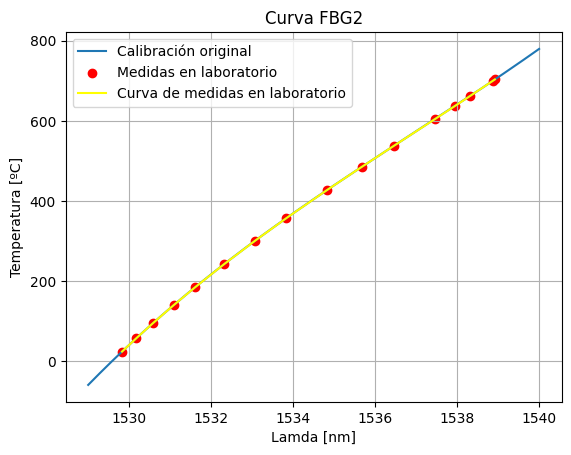

In [133]:
# Dibujar la funcion de calibración del fabricante
intervalo_lamda = np.linspace(1529, 1540, 1000)  # Ajusta el rango según tus necesidades
temperatura_original = calib_FBG2(intervalo_lamda)
plt.plot(intervalo_lamda, temperatura_original, label='Calibración original')

# Graficar los valores medios_loc vs valores_medios_temp para cada subcarpeta
plt.scatter(valores_medios_loc, valores_medios_temp, label="Medidas en laboratorio",color='red')
plt.plot(sorted(valores_medios_loc), sorted(valores_medios_temp), label="Curva de medidas en laboratorio",color='yellow')

plt.legend()
plt.grid(True)

plt.title('Curva FBG2')
plt.xlabel('Lamda [nm]')
plt.ylabel('Temperatura [ºC]')
plt.show()


# Representación y comparación usando temperaturas dadas por termopar
Representamos ahora las temperaturas que daba el termopar con sus lamdas asociadas de la FB2

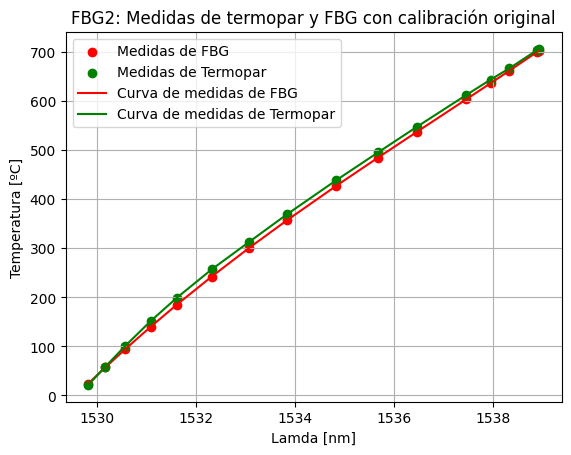

In [134]:
#Calculamos el valor medio de la temperatura dada por el termopar en cada caso

lamdas_sorted = sorted(valores_medios_loc)
temps_sorted_fbg = sorted(valores_medios_temp)
temps_min = [21.2, 58.1, 100.9, 150.7, 198.5, 256.9, 313.2, 369.1, 438, 495.1, 547, 611.2, 642, 664, 701.5, 705.1]
temps_max = [21.2, 58.8, 101.5, 151.6, 198.7, 257.2, 313.6, 369.5, 438.8, 496.5, 549.7, 614.5, 646.5, 670, 706.9, 708.5]
temps_sorted_termopar = [(a + b)/2 for a, b in zip(temps_min, temps_max)]

plt.scatter(lamdas_sorted, temps_sorted_fbg, label="Medidas de FBG",color='red')
plt.scatter(lamdas_sorted, temps_sorted_termopar, label="Medidas de Termopar",color='Green')

plt.plot(lamdas_sorted, temps_sorted_fbg, label="Curva de medidas de FBG",color='red')
plt.plot(lamdas_sorted, temps_sorted_termopar, label="Curva de medidas de Termopar",color='Green')


plt.legend()
plt.grid(True)

plt.title('FBG2: Medidas de termopar y FBG con calibración original')
plt.xlabel('Lamda [nm]')
plt.ylabel('Temperatura [ºC]')
plt.show()

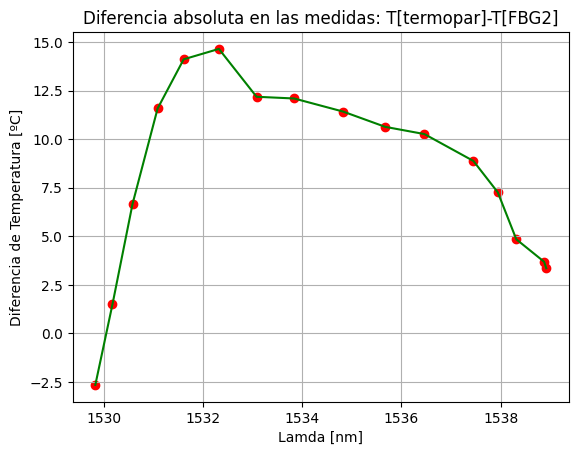

In [135]:
diferencia_temps = [(a - b) for a, b in zip(temps_sorted_termopar, temps_sorted_fbg)]

plt.plot(lamdas_sorted, diferencia_temps,color='Green')
plt.scatter(lamdas_sorted, diferencia_temps,color='Red')


plt.grid(True)

plt.title('Diferencia absoluta en las medidas: T[termopar]-T[FBG2]')
plt.xlabel('Lamda [nm]')
plt.ylabel('Diferencia de Temperatura [ºC]')
plt.show()

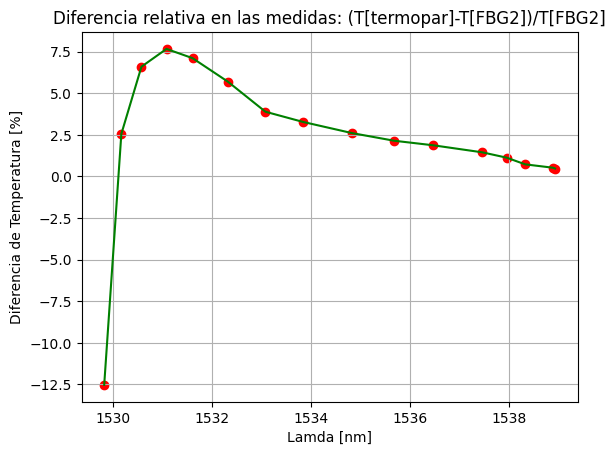

In [136]:
diferencia_rel_temps = [100*(a - b)/a for a, b in zip(temps_sorted_termopar, temps_sorted_fbg)]

plt.plot(lamdas_sorted, diferencia_rel_temps,color='Green')
plt.scatter(lamdas_sorted, diferencia_rel_temps,color='Red')


plt.grid(True)

plt.title('Diferencia relativa en las medidas: (T[termopar]-T[FBG2])/T[FBG2]')
plt.xlabel('Lamda [nm]')
plt.ylabel('Diferencia de Temperatura [%]')
plt.show()

# Interpolamos con los valores dados por el termopar

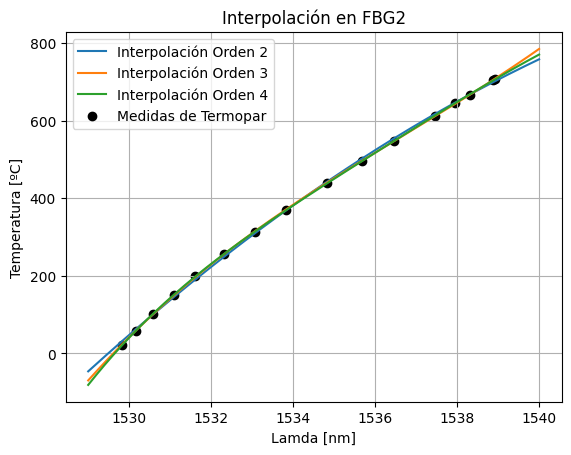

In [137]:
# lamdas_sorted es la referencia en X y temps_sorted_termopar es la referencia en Y
lamda_ref = 1529.851

from scipy.interpolate import InterpolatedUnivariateSpline

interp2 = np.poly1d(np.polyfit(lamdas_sorted,temps_sorted_termopar,2))
interp3 = np.poly1d(np.polyfit(lamdas_sorted,temps_sorted_termopar,3))
interp4 = np.poly1d(np.polyfit(lamdas_sorted,temps_sorted_termopar,4))


lamdas_plot = np.linspace(1529,1540,500)
temps_interp2 = interp2(lamdas_plot)
temps_interp3 = interp3(lamdas_plot)
temps_interp4 = interp4(lamdas_plot)

plt.plot(lamdas_plot,temps_interp2,label="Interpolación Orden 2")
plt.plot(lamdas_plot,temps_interp3,label="Interpolación Orden 3")
plt.plot(lamdas_plot,temps_interp4,label="Interpolación Orden 4")

plt.scatter(lamdas_sorted, temps_sorted_termopar, label="Medidas de Termopar",color='black')
plt.legend()
plt.grid(True)
plt.title('Interpolación en FBG2')
plt.xlabel('Lamda [nm]')
plt.ylabel('Temperatura [ºC]')
plt.show()

In [138]:
print("Modelo de orden 2:")
print(interp2)
print("------------------------------------------------------")
print("Modelo de orden 3:")
print(interp3)
print("------------------------------------------------------")
print("Modelo de orden 4:")
print(interp4)
print("------------------------------------------------------")
print("Siendo X la longitud de onda")

Modelo de orden 2:
        2
-2.081 x + 6461 x - 5.013e+06
------------------------------------------------------
Modelo de orden 3:
        3        2
0.3055 x - 1408 x + 2.164e+06 x - 1.109e+09
------------------------------------------------------
Modelo de orden 4:
          4         3           2
-0.03813 x + 234.3 x - 5.4e+05 x + 5.531e+08 x - 2.125e+11
------------------------------------------------------
Siendo X la longitud de onda


In [139]:
def adjR(x, y, degree):
    results = {}
    coeffs = np.polyfit(x, y, degree)
    p = np.poly1d(coeffs)
    yhat = p(x)
    ybar = np.sum(y)/len(y)
    ssreg = np.sum((yhat-ybar)**2)
    sstot = np.sum((y - ybar)**2)
    result = 1- (((1-(ssreg/sstot))*(len(y)-1))/(len(y)-degree-1))

    return result

R2 = adjR(lamdas_sorted,temps_sorted_termopar,2)
R3 = adjR(lamdas_sorted,temps_sorted_termopar,3)
R4 = adjR(lamdas_sorted,temps_sorted_termopar,4)

print("R-Cuadrado para polinomio Orden 2 = ",R2)
print("R-Cuadrado para polinomio Orden 3 = ",R3)
print("R-Cuadrado para polinomio Orden 4 = ",R4)

R-Cuadrado para polinomio Orden 2 =  0.9993736017855345
R-Cuadrado para polinomio Orden 3 =  0.9999344825586644
R-Cuadrado para polinomio Orden 4 =  0.9999880023278951


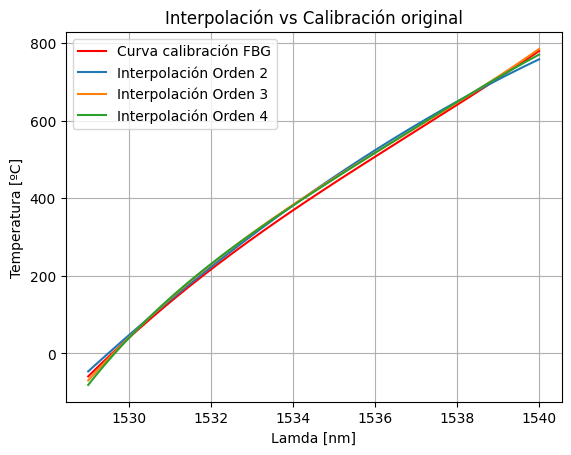

In [150]:
calibracion_original = calib_FBG2(lamdas_plot)
plt.plot(lamdas_plot, calibracion_original, label="Curva calibración FBG",color='red')
plt.plot(lamdas_plot,temps_interp2,label="Interpolación Orden 2")
plt.plot(lamdas_plot,temps_interp3,label="Interpolación Orden 3")
plt.plot(lamdas_plot,temps_interp4,label="Interpolación Orden 4")
plt.legend()
plt.grid(True)
plt.title('Interpolación vs Calibración original')
plt.xlabel('Lamda [nm]')
plt.ylabel('Temperatura [ºC]')
plt.show()

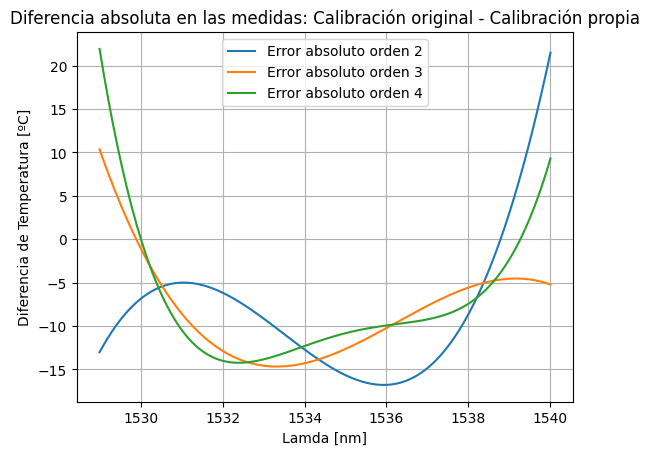

In [151]:
# Calculamos la diferencia entre la calibración original y nuestra interpolación

diferencia_curvas2 = [(a - b) for a, b in zip(calibracion_original, temps_interp2)]
plt.plot(lamdas_plot, diferencia_curvas2,label="Error absoluto orden 2")
diferencia_curvas3 = [(a - b) for a, b in zip(calibracion_original, temps_interp3)]
plt.plot(lamdas_plot, diferencia_curvas3,label="Error absoluto orden 3")
diferencia_curvas4 = [(a - b) for a, b in zip(calibracion_original, temps_interp4)]
plt.plot(lamdas_plot, diferencia_curvas4,label="Error absoluto orden 4")

plt.grid(True)
plt.legend()

plt.title('Diferencia absoluta en las medidas: Calibración original - Calibración propia')
plt.xlabel('Lamda [nm]')
plt.ylabel('Diferencia de Temperatura [ºC]')
plt.show()

El polinomio de orden 3 es el que tiene el error más acotado